# Pytorch Workflow

In [1]:
import torch
from torch import nn ## nn contains all of PyTorch's building blocks for neural network
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.2.2'

## 1. Data preparation

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Spliting data into training and testing

In [6]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [7]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

    # Plot test data in yellow
    plt.scatter(test_data, test_labels, c='y', s=4, label="Test data")

    # Are there predictions?
    if predictions is not None:
        #Plot the predictions if they exist
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictios")

    # Show the legend
    plt.legend(prop={"size": 14})

## 2. Build model

In [8]:
from torch import nn

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

### Pytorch model building essential

* torch.nn contain all of the building for computational graphs (a neural network)
* torch.nn.Parameter - what parameter should our model try and learn, often a Pytorch layer form torch.nn will set for us
* torch.nn.Module - The base class for all neural network modules, you should override forward()
* torch.optim - optimizers in Pytorch, help in gradient descent
* def forward() - this method define what happen in the forward computation
* torch.utils.data.Dataset
* torch.utils.data.DataLoader
* torchvision.transform

In [62]:
torch.manual_seed(42)

# Create an instance of the model
model_0 = LinearRegressionModel()

# Check the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction with inferent mode

In [16]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

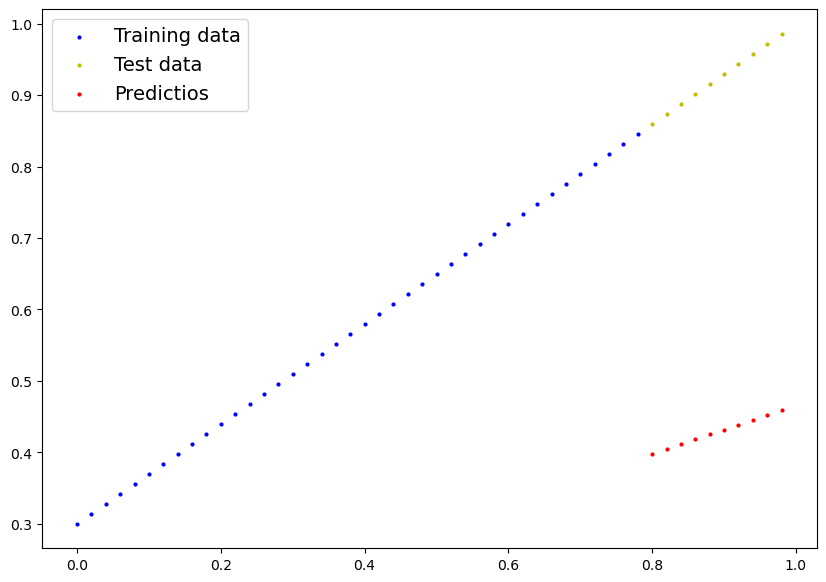

In [17]:
plot_predictions(predictions=y_preds)

## 3. Train model
Make the model move from some random unknown parameters to some known parameters

In [64]:
# set up a loss function
loss_fn = nn.L1Loss()

# set up an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

### Building a training loop in Pytorch

0. Loop through the data
1. Forward pass (moving data though forward function) to make predictions on data
2. Calculate the loss (compare the predictions and labels)
3. Optimizer zero grad
4. Loss backward - move backward through the network to calculate the gradients of each parameters with respect to the loss (backpropagation)
5. Optimizer step - use the gradient to adjust our model's parameters to try and improve the loss (gradient descent)
6. 

In [65]:
# An epochs is one loop through the data
torch.manual_seed(42)
epochs = 200

# Track values
epochs_count = []
loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # sets all parameters that required gradients to required gradients
    
    # 1. Forward pass
    y_pred = model_0(X_train)
    
    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward (back propagation)
    loss.backward()
    
    # 5. Step the optimizer
    optimizer.step()
    
    ### Testing
    model_0.eval() # turns off different setting in the model not needed for evaluation
    with torch.inference_mode():
        # 1. Do the forward pass
        test_pred = model_0(X_test)
        
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 9:
        epochs_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        
        print(model_0.state_dict())
        
    

Epoch: 9 | Loss: 0.20919232070446014 | Test loss: 0.3598262071609497
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
Epoch: 19 | Loss: 0.09681284427642822 | Test loss: 0.22817862033843994
OrderedDict([('weights', tensor([0.4146])), ('bias', tensor([0.3258]))])
Epoch: 29 | Loss: 0.0545857772231102 | Test loss: 0.14967669546604156
OrderedDict([('weights', tensor([0.4483])), ('bias', tensor([0.3743]))])
Epoch: 39 | Loss: 0.04591871052980423 | Test loss: 0.11538954079151154
OrderedDict([('weights', tensor([0.4728])), ('bias', tensor([0.3868]))])
Epoch: 49 | Loss: 0.04202762991189957 | Test loss: 0.10030148178339005
OrderedDict([('weights', tensor([0.4920])), ('bias', tensor([0.3848]))])
Epoch: 59 | Loss: 0.0385376438498497 | Test loss: 0.08928143978118896
OrderedDict([('weights', tensor([0.5100])), ('bias', tensor([0.3798]))])
Epoch: 69 | Loss: 0.035098835825920105 | Test loss: 0.0810088962316513
OrderedDict([('weights', tensor([0.5272])), ('bias', tensor([0.3728])

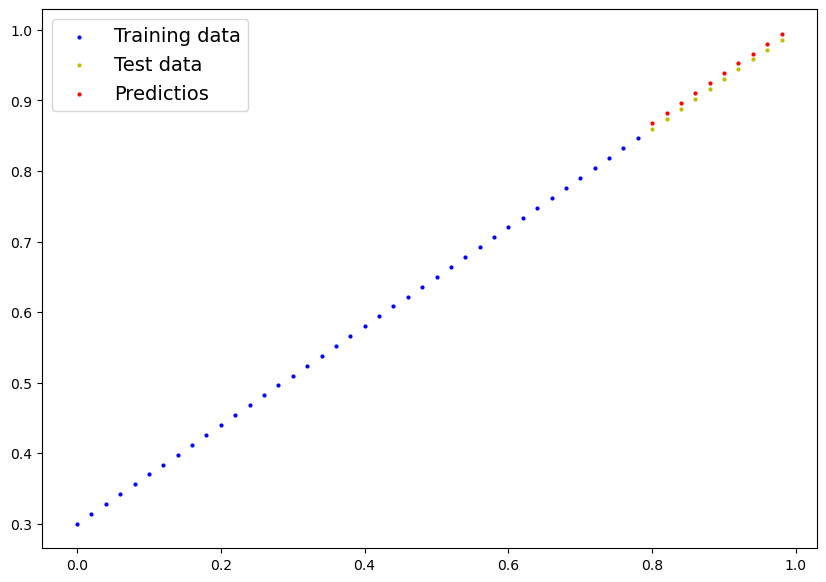

In [66]:
with torch.inference_mode():
    y_preds1 = model_0(X_test)
plot_predictions(predictions=y_preds1)

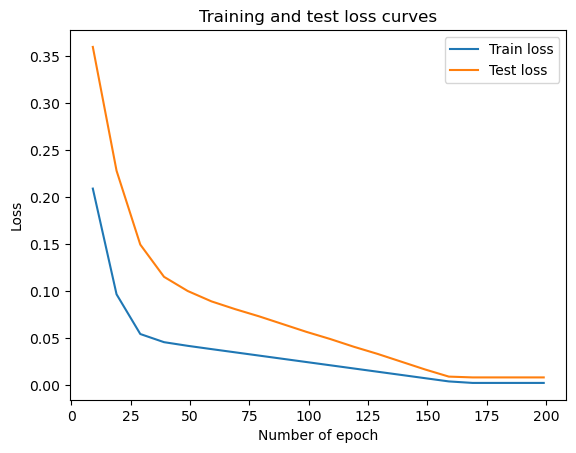

In [68]:
# plot the loss curve
import numpy as np
plt.plot(epochs_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epochs_count, test_loss_values, label="Test loss")
plt.xlabel("Number of epoch")
plt.ylabel("Loss")
plt.title("Training and test loss curves")
plt.legend()

## Saving a model in Pytorch

* torch.save() - save pytorch model in pickle format
* torch.load() - load a saved pytorch object
* torch.nn.Module.load_state_dict() - load a model's saved state dictionary

In [71]:
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to models\01_pytorch_workflow_model_0.pth


## Loading a Pytorch Model

Since we save just the state dict rather than the entire model, we need to create a new instance of the model class again

In [72]:
# Instantiate new instance of model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [73]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [75]:
model_1 = LinearRegressionModelV2()

In [74]:

# Set the model to use the target device
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [76]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [77]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.2191]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2018], device='cuda:0'))])

In [78]:
# Set up loss function
loss_fn = nn.L1Loss()

# Setup optimizer
optimizer = torch.optim.SGD(lr=0.01,
                            params=model_1.parameters())

In [80]:
torch.manual_seed(42)

epochs = 200
# put data in the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    
    # 1. Forward
    y_pred = model_1(X_train)
    
    # 2. calucate loss
    loss = loss_fn(y_pred, y_train)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Loss backward
    loss.backward()
    
    # 5. Optimzer step
    optimizer.step()
    
    ### Testing
    model_1.eval()
    
    with torch.inference_mode():
        test_pred = model_1(X_test)
        
        test_loss = loss_fn(test_pred, y_test)
    
    # Print out
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Loss: 0.4566597044467926 | Test loss: 0.902740478515625
Epoch: 10 | Loss: 0.3415392339229584 | Test loss: 0.7685304880142212
Epoch: 20 | Loss: 0.2548103630542755 | Test loss: 0.6518100500106812
Epoch: 30 | Loss: 0.20335502922534943 | Test loss: 0.5596543550491333
Epoch: 40 | Loss: 0.17333531379699707 | Test loss: 0.4878644049167633
Epoch: 50 | Loss: 0.15608887374401093 | Test loss: 0.4337606430053711
Epoch: 60 | Loss: 0.14575019478797913 | Test loss: 0.3929426968097687
Epoch: 70 | Loss: 0.13897858560085297 | Test loss: 0.36251887679100037
Epoch: 80 | Loss: 0.13399271667003632 | Test loss: 0.3386967182159424
Epoch: 90 | Loss: 0.12999270856380463 | Test loss: 0.320896714925766
Epoch: 100 | Loss: 0.1262269765138626 | Test loss: 0.3064868450164795
Epoch: 110 | Loss: 0.12273695319890976 | Test loss: 0.2954670786857605
Epoch: 120 | Loss: 0.1192469522356987 | Test loss: 0.2844472825527191
Epoch: 130 | Loss: 0.11575694382190704 | Test loss: 0.2734275460243225
Epoch: 140 | Loss: 0.11

In [81]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.2440]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.4913], device='cuda:0'))])